<a href="https://colab.research.google.com/github/t108368071/MyProject/blob/master/LSTM_SBP.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
from google.colab import drive 

drive.mount('/content/gdrive')
%cd /content/gdrive/MyDrive/Colab Notebooks/
#df_all = pd.read_csv("NormalBP_features_90000.csv") 
#df_all = pd.read_csv("NormalBP_features_13000.csv") 
#df_all = pd.read_csv("HIGHBP_features_13000.csv")
#df_all = pd.read_csv("LOWBP_features_13000.csv")
df_all = pd.read_csv("MIXBP_features_39000.csv")

#num_features = ['cardiac_period', 'SUT', 'DT', 'DW_10', 'DW_25', 'DW_33', 'DW_50', 'DW_66','DW_75', 'SW_10 + DW_10', 'SW_10/DW_10', 'SW_25 + DW_25', 'SW_25/DW_25', 'SW_33 + DW_33', 'SW_33/DW_33','SW_50 + DW_50', 'SW_50 / DW_50', 'SW_66 + DW_66', 'SW_66 / DW_66','SW_75 + DW_75', 'SW_75 / DW_75','area','area_s','area_d']

#正常特徵
#num_features = ['cardiac_period', 'SUT', 'DT','SW_25 + DW_25','SW_75 + DW_75','DW_50','SW_50 + DW_50','area_d']

#高血壓特徵
#num_features = ['cardiac_period','DT','area_d','area_s','SW_50 + DW_50','DW_33','SW_33/DW_33','SW_10/DW_10']

#低血壓特徵
#num_features = ['cardiac_period','DT','area_d','area_s','SUT','area','SW_10/DW_10','SW_25/DW_25']

#混和特徵
num_features = ['cardiac_period','SUT', 'DT','DW_50','SW_75 / DW_75','area_d','DW_75', 'SW_10/DW_10']

#target = ['diastolic']
target = ['systolic']

data = df_all[num_features + target]
data.head()

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).
/content/gdrive/MyDrive/Colab Notebooks


,cardiac_period,SUT,DT,DW_50,SW_75 / DW_75,area_d,DW_75,SW_10/DW_10,systolic
0,70,17,54,14,0.666667,0.741239,9,0.285714,136.372739
1,71,17,53,14,0.777778,0.712137,9,0.378378,122.940610
2,70,18,53,14,0.888889,0.679953,9,0.368421,122.110261
3,71,17,54,14,0.777778,0.692348,9,0.368421,120.889158
4,70,17,53,15,0.700000,0.711011,10,0.260000,119.033082


In [ ]:
data_target = pd.DataFrame(data, columns=["systolic"])
data.drop(["systolic"], axis=1, inplace=True)
data_target.head()

/usr/local/lib/python3.7/dist-packages/pandas/core/frame.py:4174: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


,systolic
0,136.372739
1,122.940610
2,122.110261
3,120.889158
4,119.033082


In [ ]:
data.head()

,cardiac_period,SUT,DT,DW_50,SW_75 / DW_75,area_d,DW_75,SW_10/DW_10
0,70,17,54,14,0.666667,0.741239,9,0.285714
1,71,17,53,14,0.777778,0.712137,9,0.378378
2,70,18,53,14,0.888889,0.679953,9,0.368421
3,71,17,54,14,0.777778,0.692348,9,0.368421
4,70,17,53,15,0.700000,0.711011,10,0.260000


In [ ]:
import pandas as pd
import numpy as np
from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation, Flatten, LSTM, TimeDistributed, RepeatVector,GRU
from keras.layers.normalization import BatchNormalization
from keras.optimizers import Adam
from keras.callbacks import EarlyStopping, ModelCheckpoint
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt

#sc=StandardScaler()
#data=sc.fit_transform(data)

def normalize(train):
  train_norm = train.apply(lambda x: (x - np.mean(x)) / (np.max(x) - np.min(x)))
  return train_norm

data = normalize(data)

data.head()

,cardiac_period,SUT,DT,DW_50,SW_75 / DW_75,area_d,DW_75,SW_10/DW_10
0,-0.324380,-0.174121,-0.217871,-0.197107,-0.051994,-0.160983,-0.126646,-0.076370
1,-0.307431,-0.174121,-0.237479,-0.197107,-0.005482,-0.196306,-0.126646,-0.004021
2,-0.324380,-0.147094,-0.237479,-0.197107,0.041029,-0.235368,-0.126646,-0.011795
3,-0.307431,-0.174121,-0.217871,-0.197107,-0.005482,-0.220324,-0.126646,-0.011795
4,-0.324380,-0.174121,-0.237479,-0.144475,-0.038040,-0.197672,-0.035737,-0.096447


In [ ]:
new_data = pd.concat([data, data_target],axis=1)
new_data.head

<bound method NDFrame.head of        cardiac_period       SUT        DT  ...     DW_75  SW_10/DW_10    systolic
0           -0.324380 -0.174121 -0.217871  ... -0.126646    -0.076370  136.372739
1           -0.307431 -0.174121 -0.237479  ... -0.126646    -0.004021  122.940610
2           -0.324380 -0.147094 -0.237479  ... -0.126646    -0.011795  122.110261
3           -0.307431 -0.174121 -0.217871  ... -0.126646    -0.011795  120.889158
4           -0.324380 -0.174121 -0.237479  ... -0.035737    -0.096447  119.033082
...               ...       ...       ...  ...       ...          ...         ...
38995       -0.222685 -0.147094 -0.178656  ... -0.217555    -0.080832   89.443062
38996       -0.222685 -0.147094 -0.159048  ... -0.217555    -0.066877   89.560287
38997       -0.239635 -0.147094 -0.159048  ... -0.126646    -0.104255   89.286761
38998       -0.222685 -0.147094 -0.178656  ... -0.217555    -0.061822   88.661558
38999       -0.222685 -0.174121 -0.159048  ... -0.126646    -0.02617

In [ ]:
def buildTrain(train, pastDay=5, futureDay=1):
  X_train, Y_train = [], []
  for i in range(train.shape[0]-futureDay-pastDay):
    X_train.append(np.array(train.iloc[i:i+pastDay]))
    Y_train.append(np.array(train.iloc[i+pastDay:i+pastDay+futureDay]["systolic"]))
  return np.array(X_train), np.array(Y_train)

def shuffle(X,Y):
  np.random.seed(10)
  randomList = np.arange(X.shape[0])
  np.random.shuffle(randomList)
  return X[randomList], Y[randomList]


def splitData(X,Y,rate):
  X_train = X[int(X.shape[0]*rate):]
  Y_train = Y[int(Y.shape[0]*rate):]
  X_val = X[:int(X.shape[0]*rate)]
  Y_val = Y[:int(Y.shape[0]*rate)]
  return X_train, Y_train, X_val, Y_val

In [ ]:
# build Data, use last 30 days to predict next 5 days
X_train, Y_train = buildTrain(new_data, 10, 1)

# shuffle the data, and random seed is 10
X_train, Y_train = shuffle(X_train, Y_train)

# split training data and validation data
X_train, Y_train, X_val, Y_val = splitData(X_train, Y_train, 0.3)
X_val, Y_val, X_test, Y_test = splitData(X_val, Y_val, 0.5)

In [ ]:
print(X_train.shape)
print(Y_train.shape)
print(X_val.shape)
print(Y_val.shape)
print(X_test.shape)
print(Y_test.shape)

(27293, 10, 9)
(27293, 1)
(5848, 10, 9)
(5848, 1)
(5848, 10, 9)
(5848, 1)


In [ ]:
def buildManyToOneModel(shape):
  model = Sequential()
  model.add(LSTM(128, input_length=shape[1], input_dim=shape[2], return_sequences=True))
  model.add(Dropout(0.3))
  model.add(LSTM(256))
  model.add(Dense(1))
  model.compile(loss="mse", optimizer="adam")
  model.summary()
  return model

In [ ]:
model = buildManyToOneModel(X_train.shape)
callback = EarlyStopping(monitor='val_loss', min_delta=0.0001, patience=150,  verbose=1, mode='min')
model.fit(X_train, Y_train, epochs=500, batch_size=64, validation_data=(X_val, Y_val), callbacks=[callback])

Model: "sequential_20"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_36 (LSTM)               (None, 10, 128)           70656     
_________________________________________________________________
dropout_20 (Dropout)         (None, 10, 128)           0         
_________________________________________________________________
lstm_37 (LSTM)               (None, 256)               394240    
_________________________________________________________________
dense_20 (Dense)             (None, 1)                 257       
Total params: 465,153
Trainable params: 465,153
Non-trainable params: 0
_________________________________________________________________
Epoch 1/500
427/427 [==============================] - 5s 7ms/step - loss: 8723.7806 - val_loss: 1850.7264
Epoch 2/500
427/427 [==============================] - 2s 6ms/step - loss: 1523.1030 - val_loss: 1234.3031
Epoch 3/500
427/427 [==========

1.981394269267952
2.7210103699393007


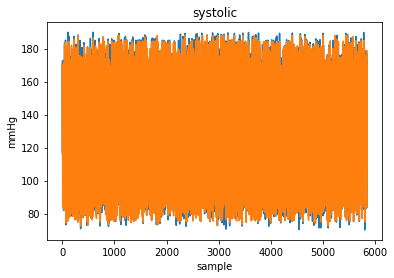

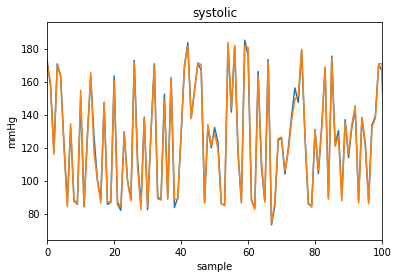

In [ ]:
testPredict = model.predict(X_test)
from sklearn.metrics import mean_absolute_error
mae_error_dbp = mean_absolute_error(testPredict,Y_test)
error_dbp_std = np.std(abs(testPredict - Y_test))
print(mae_error_dbp)
print(error_dbp_std)

plt.figure(1)
plt.title("systolic")
plt.xlabel("sample") 
plt.ylabel("mmHg") 
plt.plot(Y_test)
plt.plot(testPredict)

plt.figure(2)
plt.title("systolic")
plt.xlabel("sample") 
plt.ylabel("mmHg")
plt.xlim(0,100) 
plt.plot(Y_test)
plt.plot(testPredict)

np.savetxt('LSTM_MIX_SBP_5w_result.csv',np.column_stack((Y_test,testPredict)),delimiter=',')